In [1]:
# The Orange Telecom's Churn Dataset, which consists of cleaned customer activity data (features), 
# along with a churn label specifying whether a customer canceled the subscription,

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegressionCV
from sklearn.svm import SVC as svc
from sklearn.ensemble import RandomForestClassifier
import statsmodels.api as sm

from tensorflow import keras
from keras import Sequential
from tensorflow.keras.layers import Dense, Conv1D, Flatten, Dropout, MaxPooling1D,Conv2D
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM


import warnings 
warnings.filterwarnings('ignore')

C:\Users\ashish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ashish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ashish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ashish\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: P

objective -- to predict weather a customer will churn or not

target variable - churn

problem - classification    



## importing the dataset

In [2]:
train = pd.read_csv('churn-bigml-80.csv')
test = pd.read_csv('churn-bigml-20.csv')


In [3]:
print(train.shape)
train.head()


(2666, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
print(test.shape)
test.head()

(667, 20)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


## train dataset

In [5]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

In [6]:
train.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [7]:
train.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [8]:
col = train.columns
col

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [9]:
train.head(3)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False


In [10]:
# checking the classes of internatoinal plan and voice mail plan

x=3
print(col[x],' - ',train[col[x]].unique())
print(col[x+1],' - ',train[col[x+1]].unique(),end='')

International plan  -  ['No' 'Yes']
Voice mail plan  -  ['Yes' 'No']

In [11]:
# checking classes for churn 

x=19
print(col[x],' - ',train[col[x]].unique())


Churn  -  [False  True]


In [12]:
train = pd.read_csv('churn-bigml-80.csv')

In [13]:
train1=train


In [14]:
# converting the string catorical data to numberic data by assining values to each class

train1['International plan']=train1['International plan'].map({'Yes':1,'No':0})
train1['Voice mail plan']=train1['Voice mail plan'].map({'Yes':1,'No':0})
train1.Churn=train1.Churn.map({False:0,True:1})

In [15]:
train1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [16]:
# creating raw dataset for data manupulation

x_train_raw = train1.drop(['State','Churn'],axis='columns')
y_train_raw = train1[['Churn']]

In [17]:
x_train_raw.head(3)

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
0,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0


In [18]:
y_train_raw.head(3)

,Churn
0,0
1,0
2,0


In [19]:
x_train_col = x_train_raw.columns
print(x_train_col)

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')


In [20]:
# using one hot enconding using pandas get dummies method

a = pd.get_dummies(x_train_raw['International plan'],prefix='International plan')
b = pd.get_dummies(x_train_raw['Voice mail plan'],prefix='Voice mail plan')


In [21]:
x_train_raw=pd.concat([x_train_raw,a,b],axis='columns')

In [22]:
x_train_raw.head()  # don't be wrong is just the value aftet getting from get dummies and droping the 1st column

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_0,International plan_1,Voice mail plan_0,Voice mail plan_1
0,128,415,0,1,25,265.1,110,45.07,197.4,99,...,91,11.01,10.0,3,2.70,1,1,0,0,1
1,107,415,0,1,26,161.6,123,27.47,195.5,103,...,103,11.45,13.7,3,3.70,1,1,0,0,1
2,137,415,0,0,0,243.4,114,41.38,121.2,110,...,104,7.32,12.2,5,3.29,0,1,0,1,0
3,84,408,1,0,0,299.4,71,50.90,61.9,88,...,89,8.86,6.6,7,1.78,2,0,1,1,0
4,75,415,1,0,0,166.7,113,28.34,148.3,122,...,121,8.41,10.1,3,2.73,3,0,1,1,0


In [23]:
x_train_raw.drop(['International plan','Voice mail plan','International plan_0','Voice mail plan_0'],axis='columns',inplace=True)

In [24]:
x_train_raw.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_1,Voice mail plan_1
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,1,0


In [25]:
x_train_col=x_train_raw.columns
x_train_col

Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'International plan_1', 'Voice mail plan_1'],
      dtype='object')

In [26]:
x_train_raw1=x_train_raw

##### scaling the data

In [27]:
scale  = MinMaxScaler()

In [28]:
for i in x_train_col:
    x_train_raw1[i]=scale.fit_transform(x_train_raw1[i].values.reshape(-1,1))


In [29]:
x_train_raw1.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_1,Voice mail plan_1
0,0.524793,0.068627,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111,0.0,1.0
1,0.438017,0.068627,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111,0.0,1.0
2,0.561983,0.068627,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000,0.0,0.0
3,0.342975,0.000000,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222,1.0,0.0
4,0.305785,0.068627,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333,1.0,0.0


<AxesSubplot:>

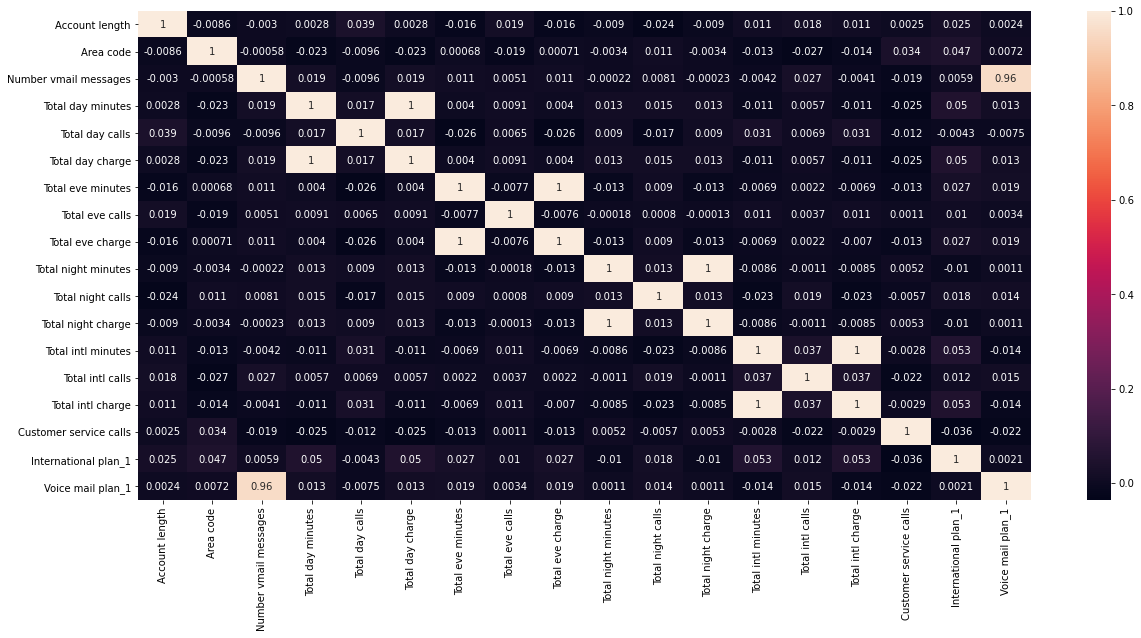

In [30]:
# checking the correlation

plt.figure(figsize=(20,9))
sns.heatmap(x_train_raw1.corr(),annot=True)

In [31]:
# creating the training dataset

x_train=x_train_raw1
x_train.head()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_1,Voice mail plan_1
0,0.524793,0.068627,0.50,0.755701,0.68750,0.755701,0.542755,0.582353,0.542866,0.572161,0.436090,0.572152,0.500,0.15,0.500000,0.111111,0.0,1.0
1,0.438017,0.068627,0.52,0.460661,0.76875,0.460597,0.537531,0.605882,0.537690,0.599772,0.526316,0.600000,0.685,0.15,0.685185,0.111111,0.0,1.0
2,0.561983,0.068627,0.00,0.693843,0.71250,0.693830,0.333242,0.647059,0.333225,0.338457,0.533835,0.338608,0.610,0.25,0.609259,0.000000,0.0,0.0
3,0.342975,0.000000,0.00,0.853478,0.44375,0.853454,0.170195,0.517647,0.170171,0.436095,0.421053,0.436076,0.330,0.35,0.329630,0.222222,1.0,0.0
4,0.305785,0.068627,0.00,0.475200,0.70625,0.475184,0.407754,0.717647,0.407959,0.407629,0.661654,0.407595,0.505,0.15,0.505556,0.333333,1.0,0.0


In [32]:
churn=pd.get_dummies(y_train_raw['Churn'],prefix='Churn',drop_first=True)

In [33]:
y_train = pd.concat([churn,y_train_raw],axis='columns')
y_train.head()

,Churn_1,Churn
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [34]:
y_train.drop('Churn',axis='columns',inplace=True)
y_train.head()

,Churn_1
0,0
1,0
2,0
3,0
4,0


### feature selection

In [35]:
# exrtacing the features using the p_value

p_value = sm.OLS(y_train,sm.add_constant(x_train))
p_value.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Churn_1   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.179
Method:                 Least Squares   F-statistic:                     33.36
Date:                Wed, 14 Apr 2021   Prob (F-statistic):          1.03e-103
Time:                        15:53:06   Log-Likelihood:                -731.58
No. Observations:                2666   AIC:                             1501.
Df Residuals:                    2647   BIC:                             1613.
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4017      0.069     -5.835      0.000      -0.537      -0.267
Account length             0.0268      0.038      0.706      0.480      -0.048       0.101
Area code                 -0.0114      0.015     -0.762      0.446      -0.041       0.018
Number vmail messages      0.1053      0.079      1.337      0.181      -0.049       0.260
Total day minutes         -8.1183    129.258     -0.063      0.950    -261.575     245.338
Total day calls            0.0489      0.050      0.985      0.325      -0.048       0.146
Total day charge           8.5472    129.267      0.066      0.947    -244.927     262.022
Total eve minutes         56.5748     66.942      0.845      0.398     -74.690     187.839
Total eve calls           -0.0192      0.052     -0.368      0.713      -0.122       0.083
Total eve charge         -56.3857     66.933     -0.842      0.400    -187.631      74.860
Total night minutes       -5.4579     34.476     -0.158      0.874     -73.060      62.144
Total night calls          0.0257      0.042      0.604      0.546      -0.058       0.109
Total night charge         5.5371     34.457      0.161      0.872     -62.028      73.102
Total intl minutes        -7.3557     11.612     -0.633      0.526     -30.125      15.414
Total intl calls          -0.2087      0.051     -4.129      0.000      -0.308      -0.110
Total intl charge          7.5463     11.613      0.650      0.516     -15.224      30.317
Customer service calls     0.5201      0.043     12.210      0.000       0.437       0.604
International plan_1       0.3178      0.021     15.396      0.000       0.277       0.358
Voice mail plan_1         -0.1377      0.048     -2.869      0.004      -0.232      -0.044
==============================================================================
Omnibus:                      664.159   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1315.610
Skew:                           1.503   Prob(JB):                    2.08e-286
Kurtosis:                       4.676   Cond. No.                     6.29e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.29e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### whole dataset

In [36]:
dataset = pd.concat([x_train,y_train],axis='columns')
print(dataset.shape)
dataset.columns


(2666, 19)


Index(['Account length', 'Area code', 'Number vmail messages',
       'Total day minutes', 'Total day calls', 'Total day charge',
       'Total eve minutes', 'Total eve calls', 'Total eve charge',
       'Total night minutes', 'Total night calls', 'Total night charge',
       'Total intl minutes', 'Total intl calls', 'Total intl charge',
       'Customer service calls', 'International plan_1', 'Voice mail plan_1',
       'Churn_1'],
      dtype='object')

#####  total number of columns
'Account length', 'Area code', 'Number vmail messages','Total day minutes', 'Total day calls', 'Total day charge','Total eve minutes', 'Total eve calls', 'Total eve charge',Total night minutes', 'Total night calls', 'Total night charge',Total intl minutes', 'Total intl calls', 'Total intl charge','Customer service calls', 'International plan_1', 'Voice mail plan_1',
'Churn_1'


##### important columns to use of modeling
'Number vmail messages', 'Total day minutes', 'Total day charge', 'Total eve minutes', 'Total eve charge', 'Total night minutes', 'Total night charge', 'Total intl minutes', 'Total intl charge','Customer service calls', 'International plan_1','Churn_1'


###### not important columns 
'Account length', 'Area code','Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls', 'International plan_1','Churn_1'

### feature removal

In [37]:
# final traing dataset

x_train1 = x_train.drop(['Account length', 'Area code','Total day calls','Total eve calls','Total night calls','Total intl calls','Customer service calls', 'International plan_1'],axis='columns')
print(x_train1.shape)
x_train1.head()

(2666, 10)


,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Voice mail plan_1
0,0.50,0.755701,0.755701,0.542755,0.542866,0.572161,0.572152,0.500,0.500000,1.0
1,0.52,0.460661,0.460597,0.537531,0.537690,0.599772,0.600000,0.685,0.685185,1.0
2,0.00,0.693843,0.693830,0.333242,0.333225,0.338457,0.338608,0.610,0.609259,0.0
3,0.00,0.853478,0.853454,0.170195,0.170171,0.436095,0.436076,0.330,0.329630,0.0
4,0.00,0.475200,0.475184,0.407754,0.407959,0.407629,0.407595,0.505,0.505556,0.0


In [38]:
print(y_train.shape)
y_train.head()

(2666, 1)


,Churn_1
0,0
1,0
2,0
3,0
4,0


## test dataset

all the steps we did in train dataset we are gone repeat in  test dataset 
creating a function for will work but i write because i want rember the things by writing the things again 

In [39]:
test.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
1,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,True
2,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,True
3,SC,111,415,No,No,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,False
4,HI,49,510,No,No,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,False


In [40]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   667 non-null    object 
 1   Account length          667 non-null    int64  
 2   Area code               667 non-null    int64  
 3   International plan      667 non-null    object 
 4   Voice mail plan         667 non-null    object 
 5   Number vmail messages   667 non-null    int64  
 6   Total day minutes       667 non-null    float64
 7   Total day calls         667 non-null    int64  
 8   Total day charge        667 non-null    float64
 9   Total eve minutes       667 non-null    float64
 10  Total eve calls         667 non-null    int64  
 11  Total eve charge        667 non-null    float64
 12  Total night minutes     667 non-null    float64
 13  Total night calls       667 non-null    int64  
 14  Total night charge      667 non-null    fl

In [41]:
test.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000,667.000000
mean,102.841079,436.157421,8.407796,180.948126,100.937031,30.761769,203.355322,100.476762,17.285262,199.685307,100.113943,8.985907,10.238381,4.527736,2.764948,1.563718
std,40.819480,41.783305,13.994480,55.508628,20.396790,9.436463,49.719268,18.948262,4.226160,49.759931,20.172505,2.239429,2.807850,2.482442,0.758167,1.333357
min,1.000000,408.000000,0.000000,25.900000,30.000000,4.400000,48.100000,37.000000,4.090000,23.200000,42.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,76.000000,408.000000,0.000000,146.250000,87.500000,24.860000,171.050000,88.000000,14.540000,167.950000,86.000000,7.560000,8.600000,3.000000,2.320000,1.000000
50%,102.000000,415.000000,0.000000,178.300000,101.000000,30.310000,203.700000,101.000000,17.310000,201.600000,100.000000,9.070000,10.500000,4.000000,2.840000,1.000000
75%,128.000000,415.000000,20.000000,220.700000,115.000000,37.520000,236.450000,113.000000,20.095000,231.500000,113.500000,10.420000,12.050000,6.000000,3.255000,2.000000
max,232.000000,510.000000,51.000000,334.300000,165.000000,56.830000,361.800000,168.000000,30.750000,367.700000,175.000000,16.550000,18.300000,18.000000,4.940000,8.000000


In [42]:
test.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [43]:
test1=test


test1['International plan']=test1['International plan'].map({'Yes':1,'No':0})
test1['Voice mail plan']=test1['Voice mail plan'].map({'Yes':1,'No':0})
test1.Churn=train1.Churn.map({False:0,True:1})

test1.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,LA,117,408,0,0,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
1,IN,65,415,0,0,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,0
2,NY,161,415,0,0,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,0
3,SC,111,415,0,0,0,110.4,103,18.77,137.3,102,11.67,189.6,105,8.53,7.7,6,2.08,2,0
4,HI,49,510,0,0,0,119.3,117,20.28,215.1,109,18.28,178.7,90,8.04,11.1,1,3.00,1,0


In [44]:
x_test_raw = test1.drop(['State','Churn'],axis='columns')
y_test_raw = test1[['Churn']]


x_test_col = x_test_raw.columns
print(x_test_col)

a = pd.get_dummies(x_test_raw['International plan'],prefix='International plan')
b = pd.get_dummies(x_test_raw['Voice mail plan'],prefix='Voice mail plan')


x_test_raw=pd.concat([x_test_raw,a,b],axis='columns')
x_test_raw.head()

Index(['Account length', 'Area code', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls'],
      dtype='object')


,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_0,International plan_1,Voice mail plan_0,Voice mail plan_1
0,117,408,0,0,0,184.5,97,31.37,351.6,80,...,90,9.71,8.7,4,2.35,1,1,0,1,0
1,65,415,0,0,0,129.1,137,21.95,228.5,83,...,111,9.40,12.7,6,3.43,4,1,0,1,0
2,161,415,0,0,0,332.9,67,56.59,317.8,97,...,128,7.23,5.4,9,1.46,4,1,0,1,0
3,111,415,0,0,0,110.4,103,18.77,137.3,102,...,105,8.53,7.7,6,2.08,2,1,0,1,0
4,49,510,0,0,0,119.3,117,20.28,215.1,109,...,90,8.04,11.1,1,3.00,1,1,0,1,0


,Churn_1
0,0
1,0
2,0
3,0
4,0


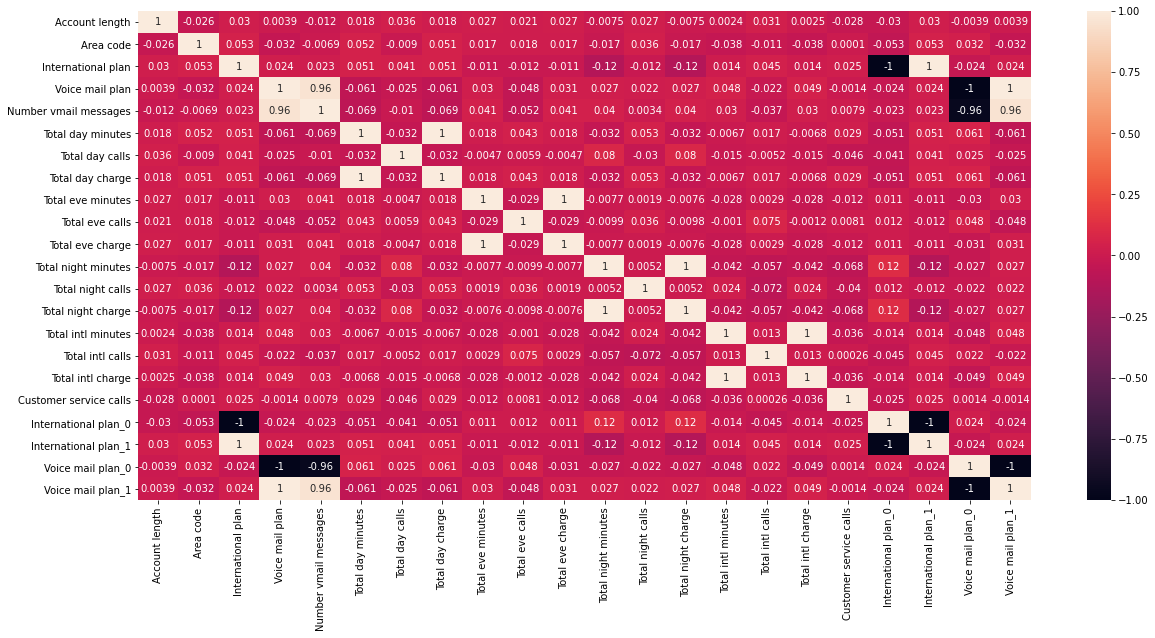

In [45]:
x_test_col=x_test_raw.columns

x_test_raw1=x_test_raw
scale  = MinMaxScaler()

for i in x_test_col:
    x_test_raw1[i]=scale.fit_transform(x_test_raw1[i].values.reshape(-1,1))


plt.figure(figsize=(20,9))
sns.heatmap(x_test_raw1.corr(),annot=True)

x_test=x_test_raw1

churn_test=pd.get_dummies(y_test_raw['Churn'],prefix='Churn',drop_first=True)

y_test = pd.concat([churn_test,y_test_raw],axis='columns')

y_test.drop('Churn',axis='columns',inplace=True)
y_test.head()

In [46]:
x_test.head()

,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,...,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,International plan_0,International plan_1,Voice mail plan_0,Voice mail plan_1
0,0.502165,0.000000,0.0,0.0,0.0,0.514267,0.496296,0.514400,0.967485,0.328244,...,0.360902,0.558994,0.475410,0.222222,0.475709,0.125,1.0,0.0,1.0,0.0
1,0.277056,0.068627,0.0,0.0,0.0,0.334630,0.792593,0.334732,0.575072,0.351145,...,0.518797,0.539007,0.693989,0.333333,0.694332,0.500,1.0,0.0,1.0,0.0
2,0.692641,0.068627,0.0,0.0,0.0,0.995460,0.274074,0.995422,0.859739,0.458015,...,0.646617,0.399097,0.295082,0.500000,0.295547,0.500,1.0,0.0,1.0,0.0
3,0.476190,0.068627,0.0,0.0,0.0,0.273995,0.540741,0.274080,0.284348,0.496183,...,0.473684,0.482914,0.420765,0.333333,0.421053,0.250,1.0,0.0,1.0,0.0
4,0.207792,1.000000,0.0,0.0,0.0,0.302853,0.644444,0.302880,0.532356,0.549618,...,0.360902,0.451322,0.606557,0.055556,0.607287,0.125,1.0,0.0,1.0,0.0


In [47]:
x_test1 = x_test[['Number vmail messages', 'Total day minutes', 'Total day charge','Total eve minutes', 'Total eve charge', 'Total night minutes','Total night charge', 'Total intl minutes', 'Total intl charge','Voice mail plan_1']]


In [48]:
print(x_test1.shape)
x_test1.head()

(667, 10)


,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Voice mail plan_1
0,0.0,0.514267,0.514400,0.967485,0.967742,0.559071,0.558994,0.475410,0.475709,0.0
1,0.0,0.334630,0.334732,0.575072,0.575019,0.538752,0.539007,0.693989,0.694332,0.0
2,0.0,0.995460,0.995422,0.859739,0.859715,0.398839,0.399097,0.295082,0.295547,0.0
3,0.0,0.273995,0.274080,0.284348,0.284321,0.483019,0.482914,0.420765,0.421053,0.0
4,0.0,0.302853,0.302880,0.532356,0.532258,0.451379,0.451322,0.606557,0.607287,0.0


In [49]:
print(x_train1.shape)
x_train1.head()

(2666, 10)


,Number vmail messages,Total day minutes,Total day charge,Total eve minutes,Total eve charge,Total night minutes,Total night charge,Total intl minutes,Total intl charge,Voice mail plan_1
0,0.50,0.755701,0.755701,0.542755,0.542866,0.572161,0.572152,0.500,0.500000,1.0
1,0.52,0.460661,0.460597,0.537531,0.537690,0.599772,0.600000,0.685,0.685185,1.0
2,0.00,0.693843,0.693830,0.333242,0.333225,0.338457,0.338608,0.610,0.609259,0.0
3,0.00,0.853478,0.853454,0.170195,0.170171,0.436095,0.436076,0.330,0.329630,0.0
4,0.00,0.475200,0.475184,0.407754,0.407959,0.407629,0.407595,0.505,0.505556,0.0


## creating a model

i am using logistic regression, random forest, svm

In [50]:
lr = LogisticRegressionCV()
rf = RandomForestClassifier(n_estimators=10)
svm = svc()

In [51]:
models = [lr,rf,svm]
models_name = ['logistic classifier','random forest','svm']
model_pred = [] 

In [52]:
score = []
score_test = []
for i in range(len(models)):
    score.append(models[i].fit(x_train1,y_train).score(x_train1,y_train))    

In [53]:
print(round(score[0],ndigits=3) ,'=', models_name[0],'\n' ,round(score[1],ndigits=3) ,'=', models_name[1] ,'\n' ,round(score[2],ndigits=3) ,'=', models_name[2])

0.861 = logistic classifier 
 0.977 = random forest 
 0.89 = svm


seems like random forest work well for training dataset 

### model prediction and accuracy, precision and recall check

In [54]:
for i in range(len(models)):
    model_pred.append(models[i].predict(x_test1))

In [55]:
result = pd.DataFrame(model_pred).T

In [56]:
result.columns = models_name

In [57]:
result = pd.concat([result,y_test],axis='columns')

In [58]:
result.head(10)

,logistic classifier,random forest,svm,Churn_1
0,0,1,0,0
1,0,1,0,0
2,1,1,1,0
3,0,0,0,0
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,0,0,0,0
8,0,0,0,0
9,0,0,0,0


In [59]:
result1=result

In [60]:
result1['Churn_1']=result1['Churn_1'].map({0:False,1:True})
result1['svm']=result1['svm'].map({0:False,1:True})
result1['random forest']=result1['random forest'].map({0:False,1:True})
result1['logistic classifier']=result1['logistic classifier'].map({0:False,1:True})

In [61]:
result1.head(10)

,logistic classifier,random forest,svm,Churn_1
0,False,True,False,False
1,False,True,False,False
2,True,True,True,False
3,False,False,False,False
4,False,False,False,False
5,False,False,False,False
6,False,False,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [62]:
# checking the what model had learnt so far by creating a confusion matrix

from sklearn.metrics import confusion_matrix,precision_score,precision_recall_fscore_support
lr_cm = confusion_matrix(result1['logistic classifier'],result1['Churn_1'])
rf_cm = confusion_matrix(result1['random forest'],result1['Churn_1'])
svm_cm = confusion_matrix(result1['svm'],result1['Churn_1'])


In [63]:
def heatmap(x):
    ax= plt.subplot()
    sns.heatmap(x,annot=True,ax=ax)
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix {}')
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])


[[578  77]
 [ 12   0]]


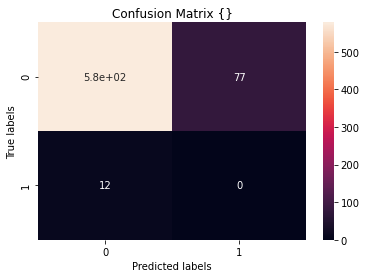

In [64]:
print(lr_cm)
heatmap(lr_cm)

[[529  72]
 [ 61   5]]


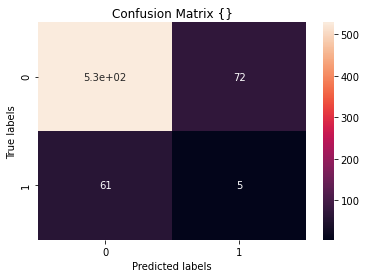

In [65]:
print(rf_cm)
heatmap(rf_cm)

[[559  76]
 [ 31   1]]


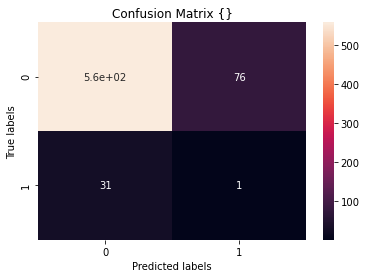

In [66]:
print(svm_cm)
heatmap(svm_cm)

In [67]:
# checking the precison, recall, and f_score

print('logistic = ', precision_recall_fscore_support(result['Churn_1'],result['logistic classifier']))
print('\n\nrandom forest = ',precision_recall_fscore_support(result['Churn_1'],result['random forest']))
print('\n\nsvm',precision_recall_fscore_support(result['Churn_1'],result['svm']))


logistic =  (array([0.88244275, 0.        ]), array([0.97966102, 0.        ]), array([0.92851406, 0.        ]), array([590,  77], dtype=int64))


random forest =  (array([0.88019967, 0.07575758]), array([0.89661017, 0.06493506]), array([0.88832914, 0.06993007]), array([590,  77], dtype=int64))


svm (array([0.88031496, 0.03125   ]), array([0.94745763, 0.01298701]), array([0.91265306, 0.01834862]), array([590,  77], dtype=int64))


######    - precisionfloat [0], recallfloat [1], fbeta_scorefloat[2] , supportNone[3]

## deep learning -- ANN

In [68]:
x = x_train1.values
y = y_train.values

In [69]:
x.shape,y.shape

((2666, 10), (2666, 1))

In [70]:
x = np.reshape(x,(x.shape[0],x.shape[1]))
x.shape

(2666, 10)

In [73]:
x_ann = x_test1.values
x_ann = np.reshape(x_ann,(x_ann.shape[0],x_ann.shape[1]))
x_ann.shape

(667, 10)

In [74]:
#input_shape = x[0].shape
#model.add(Dense(units=20, activation='relu', input_shape=input_shape))

model = keras.Sequential([
    keras.layers.Dense(51,activation='relu'),
    keras.layers.Dense(21,activation='sigmoid'),
    keras.layers.Dense(2,activation='sigmoid')
    
])
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x,y,validation_data=(x_ann, y_test),epochs=50)

Train on 2666 samples, validate on 667 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/50
2666/2666 [==============================] - 0s 143us/sample - loss: 0.5183 - acc: 0.7566 - val_loss: 0.3629 - val_acc: 0.8846
Epoch 2/50
2666/2666 [==============================] - 0s 69us/sample - loss: 0.4182 - acc: 0.8545 - val_loss: 0.3646 - val_acc: 0.8846
Epoch 3/50
2666/2666 [==============================] - 0s 89us/sample - loss: 0.4162 - acc: 0.8545 - val_loss: 0.3676 - val_acc: 0.8846
Epoch 4/50
2666/2666 [==============================] - 0s 95us/sample - loss: 0.4140 - acc: 0.8545 - val_loss: 0.3717 - val_acc: 0.8846
Epoch 5/50
2666/2666 [==============================] - 0s 96us/sample - loss: 0.4121 - acc: 0.8545 - val_loss: 0.3749 - val_acc: 0.8846
Epoch 6/50
2666/2666 [==============================] - 0s 87us/sample - loss: 0.4104 - acc: 0.8545 - val_loss: 0.3709 - val_acc: 0.8846
Epoch 7/50
2666/2666 [==============

In [75]:
ann_pred = model.predict(x_ann)
np.argmax(ann_pred[0])

0

In [76]:
ann_pred1 = []
for i in range(len(ann_pred)):
    ann_pred1.append(np.argmax(model.predict(x_ann)[i]))

In [77]:
ann_pred1 = pd.DataFrame(ann_pred1)
result_ann = pd.concat([ann_pred1,y_test],axis='columns')
result_ann.columns = ['ann pred','churn_1']


In [78]:
result_ann.head()

,ann pred,churn_1
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [79]:
ann_cm = confusion_matrix(result_ann['churn_1'],result_ann['ann pred'])
ann_cm

array([[546,  44],
       [ 75,   2]], dtype=int64)

### deep learning CNN

In [83]:
x3 = x.reshape(x.shape[0],x.shape[1],1)
#x3 = x3.reshape(x3.shape + (1,))



In [84]:
x3.shape

(2666, 10, 1)

In [89]:
model= Sequential()

model.add(Conv1D(60,2, input_shape=(10,1), activation='sigmoid'))
model.add(Conv1D(30,2,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Flatten())

model.add(Dense(60,activation='relu'))
model.add(Dense(60,activation='relu'))
model.add(Dropout(0.2))
 
model.add(Dense(1,activation='softmax'))



TypeError: The added layer must be an instance of class Layer. Found: <tensorflow.python.keras.layers.convolutional.Conv1D object at 0x000001EC49FA35F8>

In [ ]:
model.compile(optimizer='adam', loss="binary_crossentropy", metrics=['accuracy'])

model.fit(x3,y,epochs=4)

### deep learning RNN

In [ ]:
x1 = np.reshape(x,(x.shape[0],x.shape[1],1))
x1.shape


In [ ]:
y_train.shape

In [ ]:
y1 = np.reshape(y,(y.shape[0],))
y1.shape


In [ ]:
x_ann2 = x_test1.values
x_ann2 = np.reshape(x_ann2,(x_ann2.shape[0],x_ann2.shape[1],1))
x_ann2.shape


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout, LSTM


In [ ]:
# build the lstm model without go_backward

model = Sequential()

# adding 1st LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# # adding 2nd LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# # adding 3rd LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

# adding desnse hidden layer
model.add(Dense(21))

# adding a output layer
model.add(Dense(2))

# compile the model

model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

# training the model
model.fit(x1,y1,epochs=11)

In [ ]:
# build the lstm model

model = Sequential()

# adding 1st LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=True,go_backwards=True))
model.add(Dropout(0.2))

# # adding 2nd LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=True))
model.add(Dropout(0.2))

# # adding 3rd LSTM layer with some dropout regulation
model.add(LSTM(units=50,return_sequences=False))
model.add(Dropout(0.2))

# adding desnse hidden layer
model.add(Dense(21))

# adding a output layer
model.add(Dense(2))

# compile the model

model.compile(optimizer='adam',loss ='sparse_categorical_crossentropy',metrics=['accuracy'])

# training the model
model.fit(x1,y1,epochs=3)

In [ ]:
rnn_pred = model.predict(x_ann2)
np.argmax(rnn_pred[0])

In [ ]:
rnn_pred1 = []
for i in range(len(ann_pred)):
    rnn_pred1.append(np.argmax(model.predict(x_ann2)[i]))

In [ ]:
rnn_pred1 = pd.DataFrame(rnn_pred1)
result_rnn = pd.concat([rnn_pred1,y_test],axis='columns')
result_rnn.columns = ['rnn_pred','churn_1']

In [ ]:
result_rnn.head()

In [ ]:
rnn_cm = confusion_matrix(result_rnn['churn_1'],result_rnn['rnn_pred'])

In [ ]:
rnn_cm